In [169]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [195]:
#Get the stock quote of apple stock market
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
#Show the data 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672


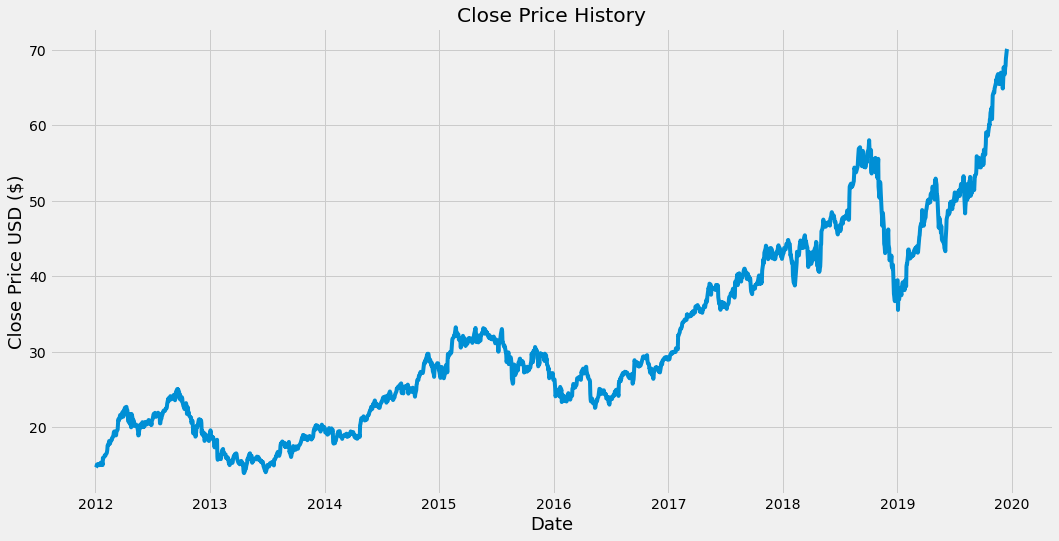

In [196]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [197]:
df = df.reset_index()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...,...
1998,2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.899139
1999,2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.069626
2000,2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.981300
2001,2019-12-16,70.197502,69.245003,69.250000,69.964996,128186000.0,69.144997


In [216]:
import datetime
def get_data(df):  
    data = df.copy()
    data['Date'] = data['Date'].astype(str)
    data['Date'] = data['Date'].str.split('-').str[2]
    data['Date'] = pd.to_numeric(data['Date'])
    return [ data['Date'].tolist(), data['Close'].tolist() ] # Convert Series to list

In [217]:
dates, prices = get_data(df)

In [218]:
print(dates, prices)
dates = dates[0:30:1]
prices = prices[0:30:1]
print(len(dates))
print(len(prices))

[3, 4, 5, 6, 9, 10, 11, 12, 13, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31, 1, 2, 3, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 21, 22, 23, 24, 27, 28, 29, 1, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 2, 3, 4, 5, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 29, 30, 31, 1, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 2, 3, 5, 6, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31, 1, 2, 3, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 31, 1, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28, 29, 30, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 24, 26, 27, 28, 31, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 22, 23, 24, 25, 28, 29, 3

In [219]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convert to 1xn dimension
    x = np.reshape(x,(len(x), 1))
    
#     svr_lin  = SVR(kernel='linear', C=1e3)
#     svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    # Fit regression model
#     svr_lin.fit(dates, prices)
#     svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    prediction = svr_rbf.predict(x)[0]
    plt.scatter(dates, prices, c='k', label='Data')
#     plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
#     plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('My Stock Regression Model ')
    plt.legend()
    plt.show()
#     return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]
    return svr_rbf.predict(x)[0]

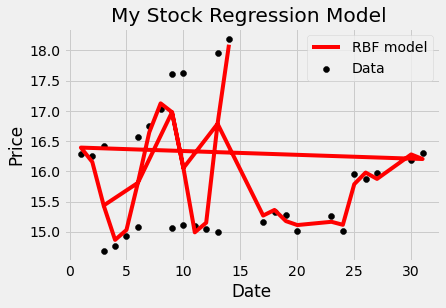

In [220]:
predicted_price = predict_prices(dates, prices, [30])

In [221]:
real_price = df['Close'][60]

In [222]:
print(f"Prediction: {predicted_price}, Real Price: {real_price}")

Prediction: 16.279194275673394, Real Price: 21.78071403503418
